In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats

import code_support

from sklearn.cluster import DBSCAN, KMeans, MeanShift
from sklearn.neighbors import NearestNeighbors as nn
from sklearn.metrics import pairwise_distances
import sklearn

In [7]:
import imp
imp.reload(code_support);

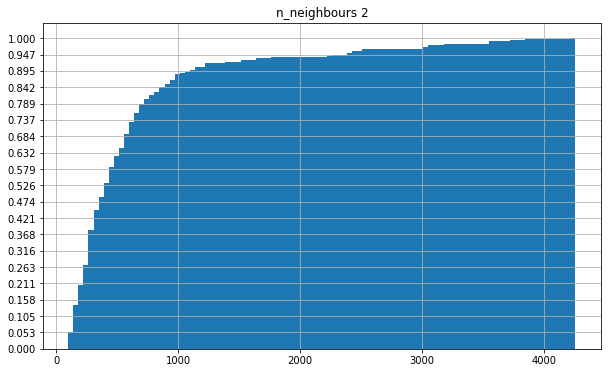

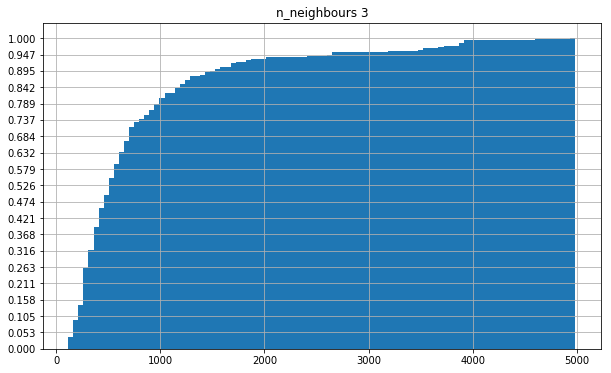

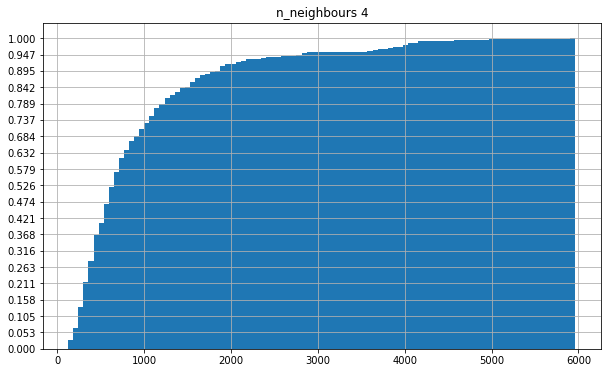

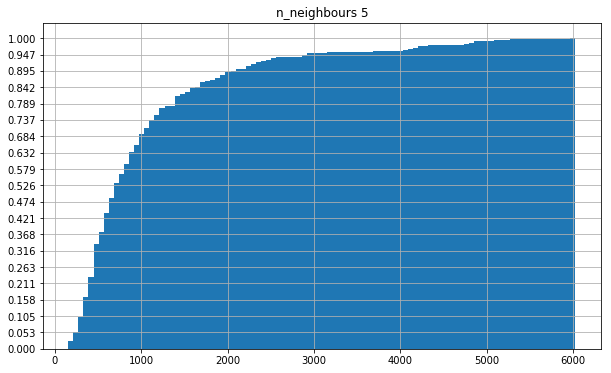

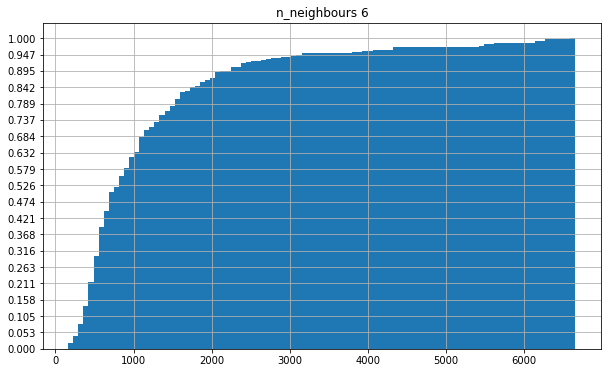

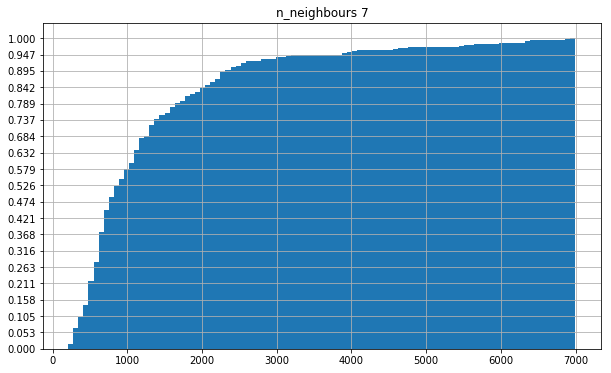

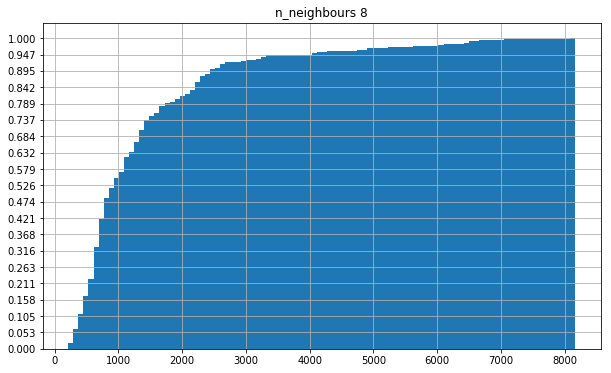

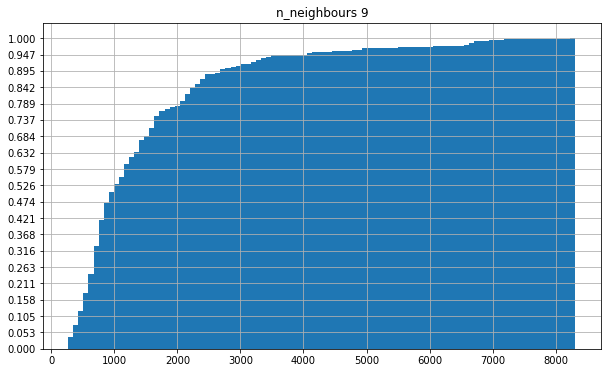

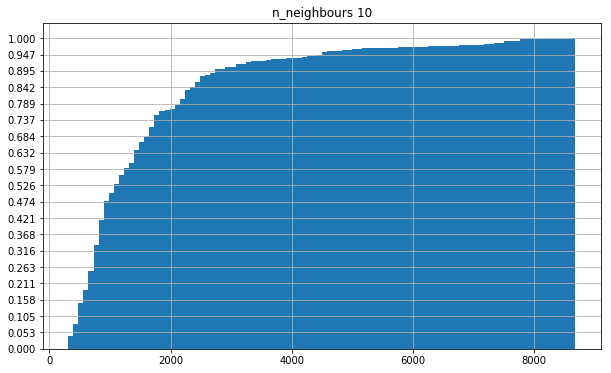

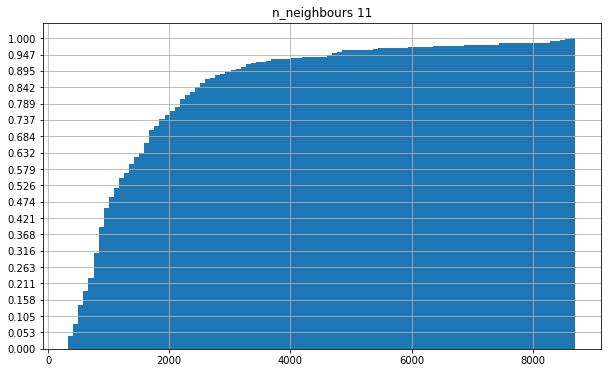

In [38]:
for n_neighbours in range(2, 12):
    nbrs = nn(n_neighbors=n_neighbours+1, algorithm='ball_tree').fit(points_xyz)
    dist, ind = nbrs.kneighbors(points_xyz)
    dist_to_nneighbor = dist[:,n_neighbours]

    dist_to_nneighbor.sort()
    fragment = dist_to_nneighbor[:]
    
    
    fig = plt.figure(figsize=(10, 6))
    plt.yticks(np.linspace(0, 1.0, 20))
    num = plt.hist(fragment, bins=100,  cumulative=True, density=True)
    plt.title("n_neighbours {0}".format(n_neighbours))
    plt.grid(True)
    plt.show()


In [140]:
def get_one(name):
    dir_path = 'data/Abell less 0.3 chosen/'
    name_file = dir_path + name
    points = code_support.reader(name_file, skip_lines=1)
    print(points.shape)
    coef_scale = 300000.0 / 66.93
    cos_dec = np.cos(points[:,2])
    sin_dec = np.sin(points[:,2])
    cos_ra = np.cos(points[:,1])
    sin_ra = np.sin(points[:,1])
    r = points[:,0]
    points_xyz = np.zeros_like(points)
    points_xyz[:,0] = r * cos_dec * cos_ra
    points_xyz[:,1] = r * cos_dec * sin_ra
    points_xyz[:,2] = r * sin_dec 
    points_xyz *= coef_scale
    return points_xyz

In [161]:
points_xyz = get_one('Abell_8 less 0.3 chosen.txt')
points_more = get_one('Abell_1 less 0.3 chosen.txt')
points_aa = get_one('Abell_21 less 0.3 chosen.txt')
points_xyz = np.vstack((points_xyz, points_aa, points_more))

(234, 3)
(284, 3)
(121, 3)


### KMean

In [170]:
k_means = KMeans(n_clusters=3)
res = k_means.fit(points_xyz)
cen = res.cluster_centers_

In [174]:
cen.T

array([[ -5207.30757122, -20593.35827657,  -7224.03305835],
       [ -2621.76073089,  -4274.30325791,  10827.82568801],
       [   827.89233431,   2093.76336354,   1374.65480807]])

### DBSCAN

In [165]:
pair_dist = pairwise_distances(points_xyz)
not_zero_pair = np.triu(pair_dist)
print("max = {0:.3f}".format(np.max(not_zero_pair[not_zero_pair!=0])))
np.median(not_zero_pair[not_zero_pair!=0])

max = 53787.056


13091.46400069485

In [203]:
n_neighbours = 6
dbscan = DBSCAN(eps=1350, min_samples=n_neighbours+1).fit(points_xyz)
cen_dbscan = points_xyz[dbscan.labels_==0].mean(axis=0)
points_xyz[dbscan.labels_==0].shape


(21, 3)

In [205]:
dbscan.labels_

array([ 0, -1,  2,  2,  0, -1,  1,  1,  1,  1,  7,  1, -1,  2, -1, -1,  3,
        0, -1, -1, -1, -1, -1,  2,  3, -1, -1,  3,  2,  8,  8,  4,  4,  4,
        4, -1, -1, -1,  1,  1,  1,  1,  1,  5,  5,  7,  7,  7, -1,  0,  0,
        0,  0,  5,  5, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  6,  6,  1,  6,  1,  6,  6,  6,  6,  6,  7,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  2,  2,  2,  2,  2,
        2,  2, -1, -1,  6, -1, -1, -1,  7,  7,  7, -1, -1, -1, -1, -1,  2,
        8, -1,  4,  4, -1,  8,  8,  8, -1,  2,  2, -1,  8,  8,  8,  8,  0,
        0,  0,  0,  3,  3,  3,  3, -1,  3,  8,  8,  8,  8,  4,  4,  4,  4,
       -1, -1, -1,  1,  1,  5,  5,  5,  6,  6,  0,  0,  0,  0,  0,  0,  0,
        5,  5,  5,  5,  5,  5, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  6, -1,  8,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  5, -1, -1, -1,  1,  2,  2,  1,  2,
        2,  2,  2, -1, -1

<IPython.core.display.Javascript object>


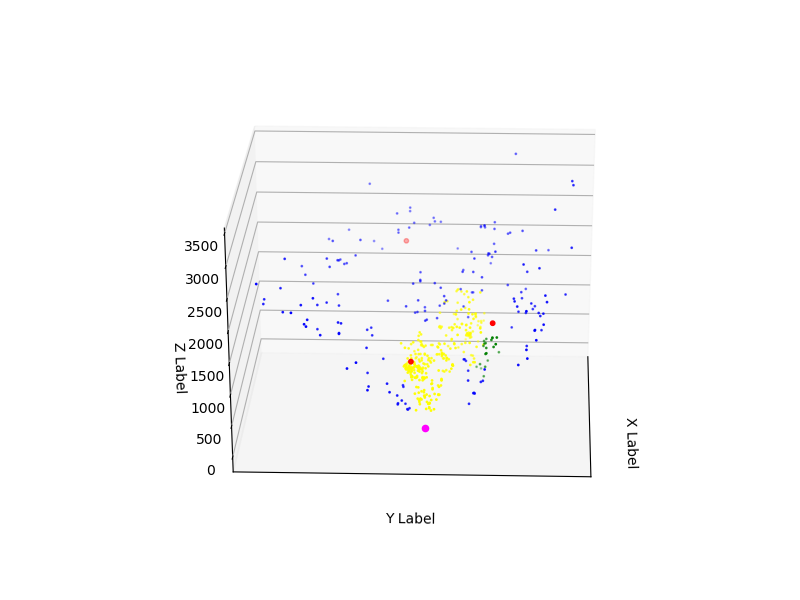

In [204]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))

#fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

#reshaped = np.reshape(points_xyz.ravel(), (points_xyz.shape[1], points_xyz.shape[0]))
reshaped = points_xyz.T
#ax.scatter(points_xyz[:,0], points_xyz[:,1], points_xyz[:,2], s=4)
ax.scatter(*(points_xyz[dbscan.labels_==-1]).T, c= 'blue', s=1)
#ax.scatter(cen[0], cen[1], cen[2], s=10, c='red')
ax.scatter(*(cen.T), s=10, c='red')
#ax.scatter(*cen_dbscan, s=15, c='black')
ax.scatter(*(points_xyz[dbscan.labels_==0]).T, c= 'green', s=1)
ax.scatter(*(points_xyz[dbscan.labels_==1]).T, c= 'yellow', s=1)
ax.scatter(0, 0, 0, c='magenta', s=20)
#ax.scatter(*(points_more).T)
#ax.scatter(*(points_aa).T)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.xticks([], [])
plt.yticks([], [])

plt.grid('True')
plt.show()
